# Subset Selection Methods

Let's apply the best subset selection method to the ISLR `Hitters` dataset. We want to predict a baseball player's `Salary` using the various statistics associated with performance in the previous year.  
  
  First of all, we see that the `Salary` variable is missing for some of the observations. The `is.na()` function can be usued to identify the missing observations. It returns a vector of the same length as the input vector, with a `TRUE` for any elements that are missing, and `False` for all non-missing elements.

In [1]:
library(ISLR)

ERROR: Error in eval(expr, envir, enclos): objeto 'pwd' no encontrado


In [2]:
attach(Hitters)

In [3]:
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [4]:
dim(Hitters)

[1] 322  20

In [5]:
sum(is.na(Salary))

[1] 59

We can see that `Salary` is missing for 59 players. The `na.omit()` function removes all of the rows that have missing values in any variable.

In [6]:
Hitters <- na.omit(Hitters)
dim(Hitters)

[1] 263  20

In [7]:
322-263

[1] 59

In [8]:
sum(is.na(Hitters))

[1] 0

## Best Subset Selection

The `regsubsets()` function, which is part of the `leaps` library, performs best subset selection by identifying the best model that contains a given number of predictors. "Best" is quantified using RSS. The syntax for this function is the same as for `lm()`. The `summary()` command outputs the best set of variables for each model size.  
  
  By default, `regsubsets()` only reports results up to the best eight-variable model.

In [9]:
#install.packages('leaps')
library(leaps)
best.fit.full <- regsubsets(Salary ~ ., Hitters)
summary(best.fit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

An asterisk indicates that a given variable is included in the corresponding model. For example, the output indicates that the best three-variable modeel contains `Hits`, `CRBI`, and `PutOuts`. If we want to choose subsets of more than eight variables, we can use the `nvmax` option. Here we fit up to a 19-variable model.

In [10]:
best.fit.full <- regsubsets(Salary ~ ., Hitters, nvmax = 19)
summary(best.fit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"  " "  

The `summary()` function also returns $R^2$, RSS, adjusted $R^2$, $C_p$, and BIC. We can examine these to try to select the best overall model.

In [11]:
names(summary(best.fit.full))

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [12]:
summary(best.fit.full)$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

As one would expect, we can see that $R^2$ monotonically increases as more variables are included in the model.

Plotting RSS, adjusted $R^2$, $C_p$, and BIC for all the models at once will help us to decide which model to select. Note the `type = 'o'` option tells `R` to connect the plotted points with lines.

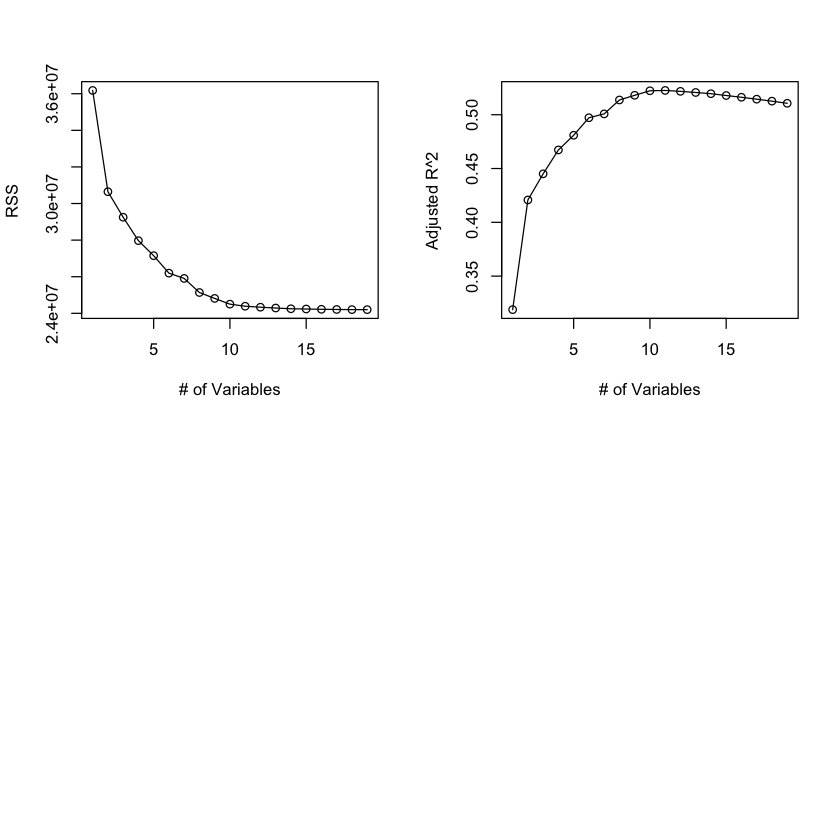

In [13]:
reg.summary <- summary(best.fit.full)
par(mfrow = c(2,2))
plot(reg.summary$rss, xlab = '# of Variables', ylab = 'RSS', type = 'o')
plot(reg.summary$adjr2, xlab = '# of Variables', ylab = 'Adjusted R^2', type = 'o')

The `points()` function works like the `plot()` function, except that it puts points on a plot that has already be created, rather than creating a new plot. The `which.max()` function can be used to identify the location of the maximum point of a vector. We'll now plot a red dot to indicatee the model with the largest adjusted $R^2$.  

In [14]:
which.max(reg.summary$adjr2)

[1] 11

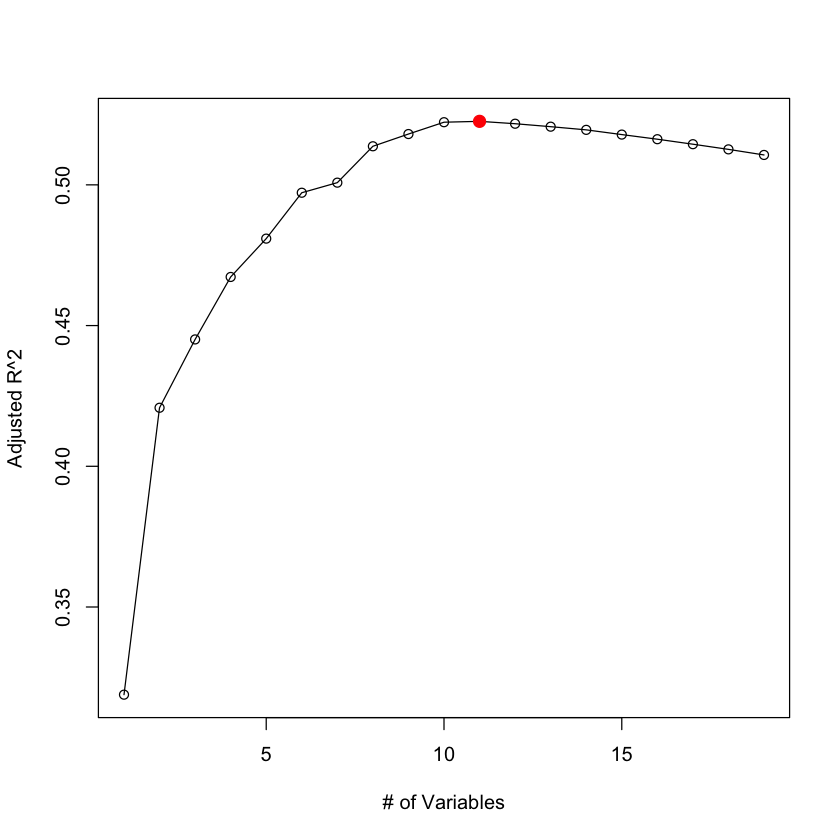

In [15]:
plot(reg.summary$adjr2, xlab = '# of Variables', ylab = 'Adjusted R^2', type = 'o')
points(11,reg.summary$adjr2[11], col = 'red', cex = 2, pch = 20)

We can similarly plot the $C_p$ and BIC statistics, and indicate the models with thee smallest statistic using `which.min()`

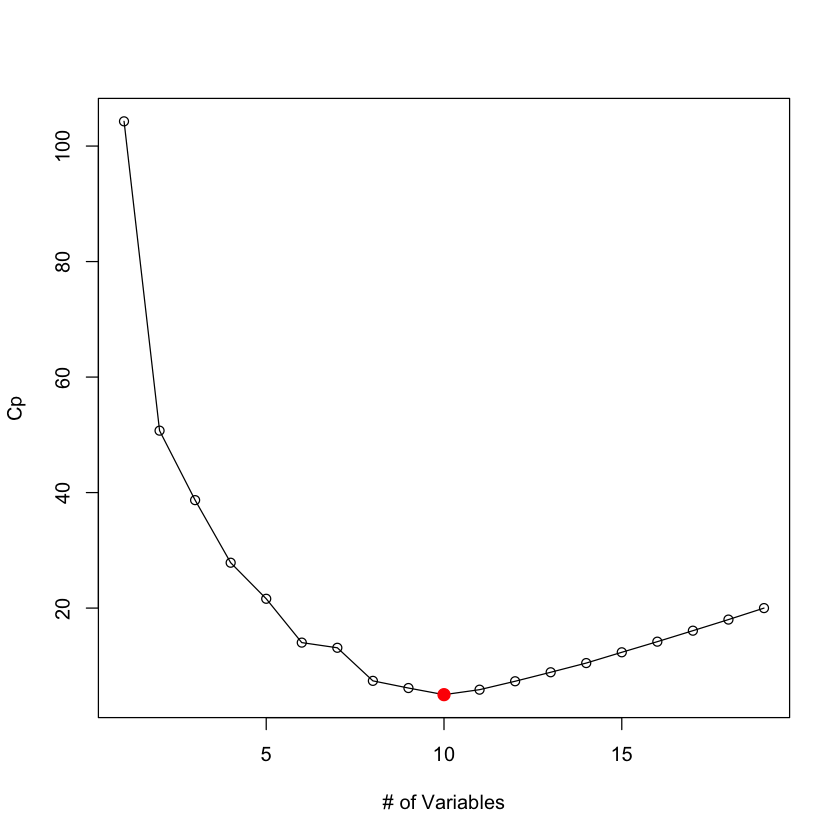

In [16]:
plot(reg.summary$cp, xlab = '# of Variables', ylab = 'Cp', type = 'o')
points(which.min(reg.summary$cp), reg.summary$cp[which.min(reg.summary$cp)], col = 'red', cex = 2, pch = 20)

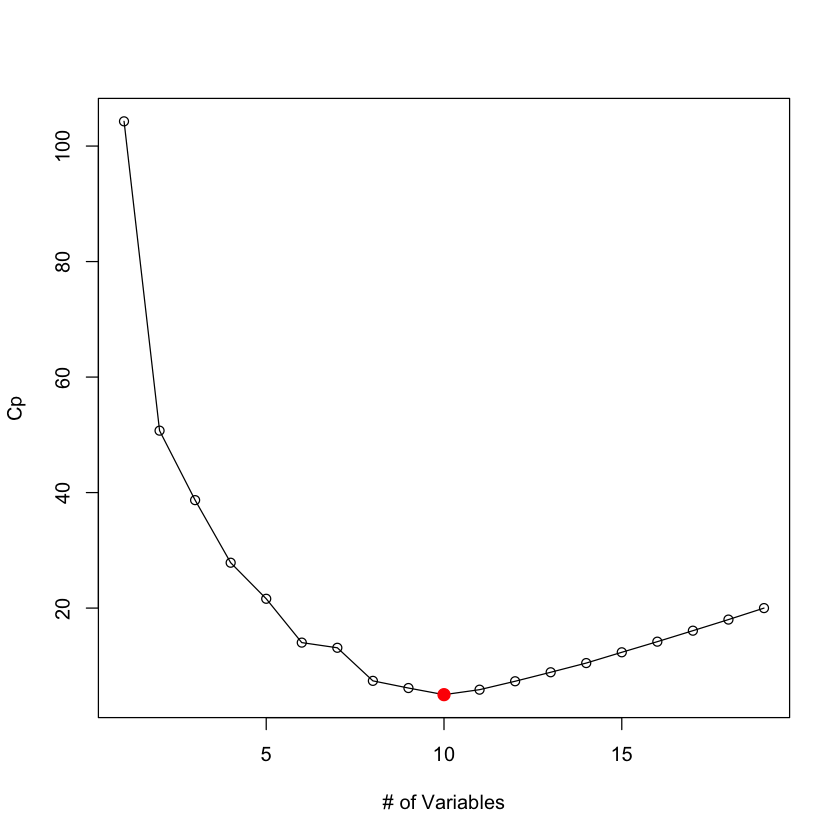

In [17]:
plot(reg.summary$bic, xlab = '# of Variables', ylab = 'BIC', type = 'o')
points(which.min(reg.summary$bic), reg.summary$cp[which.min(reg.summary$bic)], col = 'red', cex = 2, pch = 20)

The `regsubsets()` function has a built-in `plot()` command which can be used to display the selected variables for the best model with a given number of predictors, ranked acording to BIC, $C_p$, adjusted $R^2$, or AIC. The shaded squares represent the variables used in that specific model.

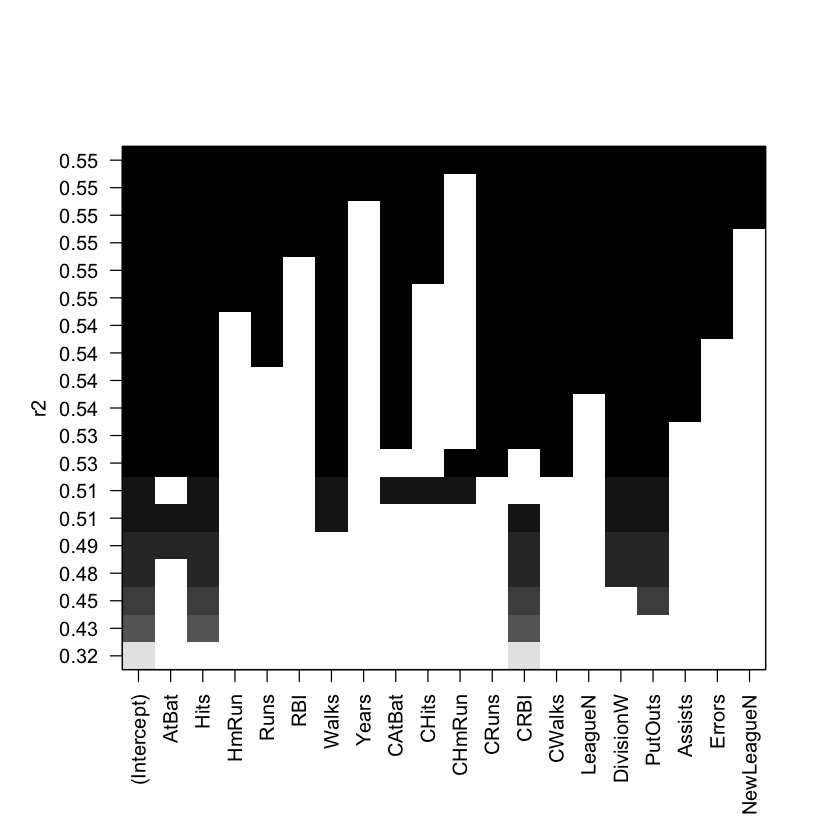

In [18]:
plot(best.fit.full, scale = 'r2')

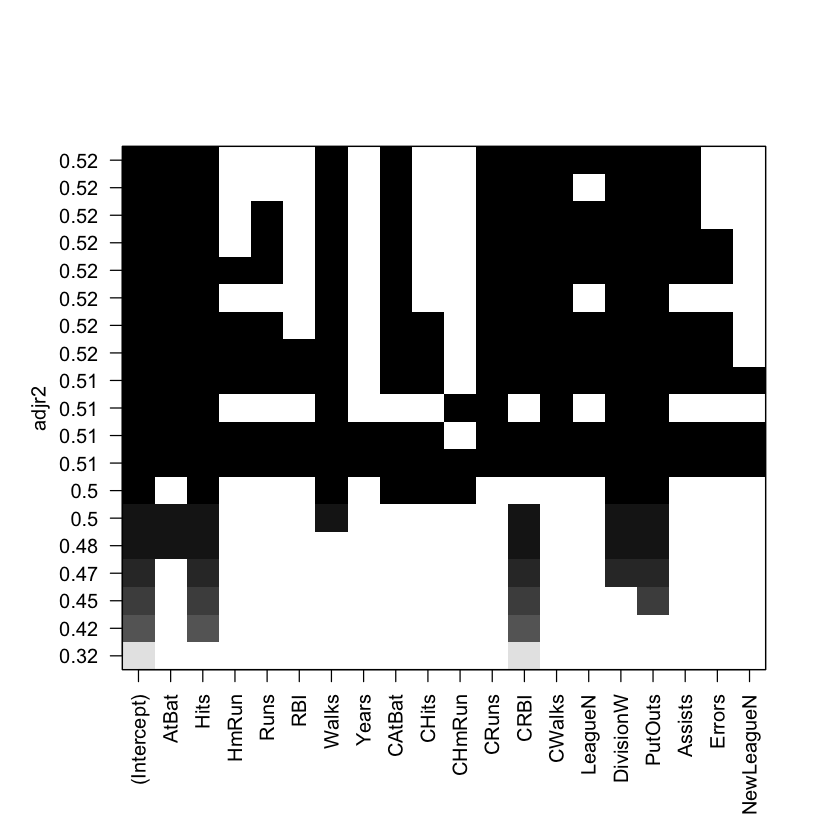

In [19]:
plot(best.fit.full, scale = 'adjr2')

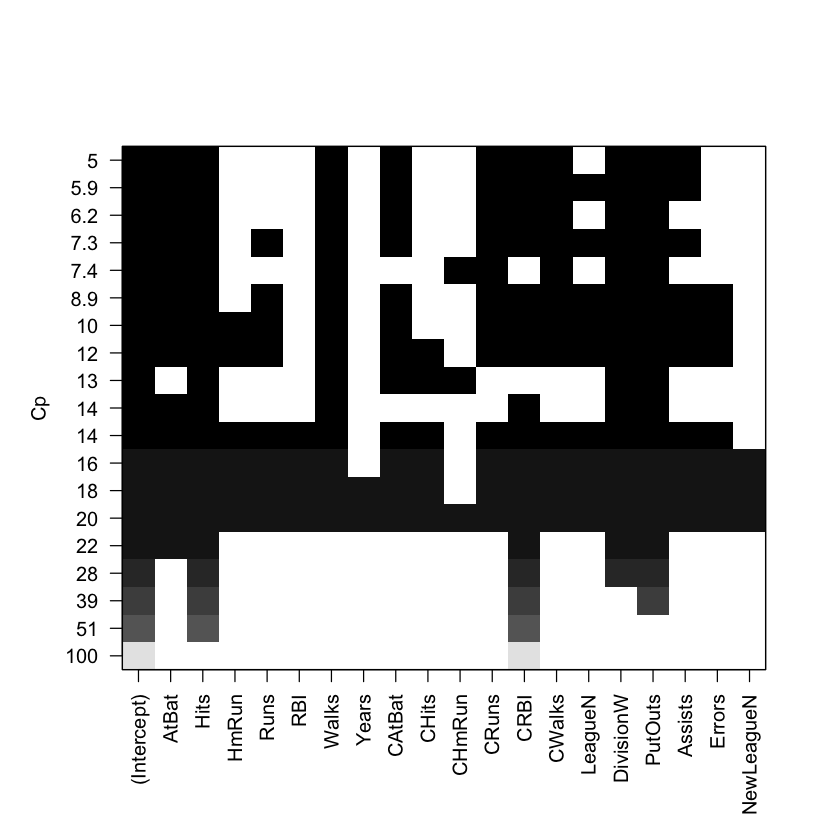

In [20]:
plot(best.fit.full, scale = 'Cp')

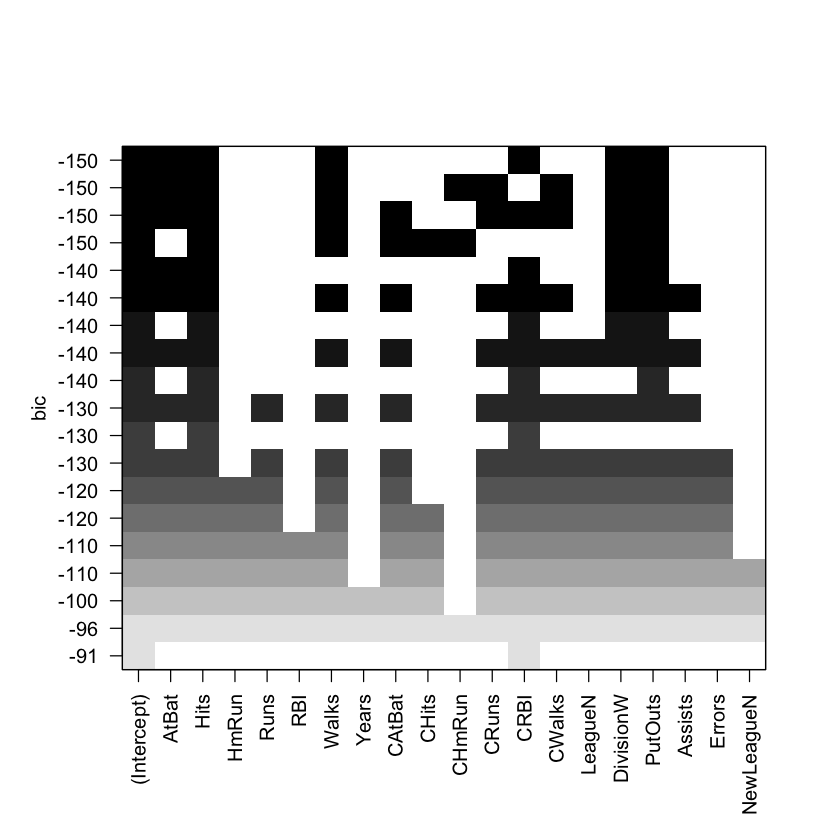

In [21]:
plot(best.fit.full, scale = 'bic')

We can see above that several models have a BIC close to -150. However, the model with the lowest BIC is the six-variable model that contains only `AtBat`, `Hits`, `Walks`, `CRBI`, `DivisionW`, and `PutOuts`. We can use the `coef()` function to see the coefficient estimates associaed with this model.

In [22]:
coef(best.fit.full, 6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

## Forward and Backward Stepwise Selection

We can also use the `regsubsets()` function to perforrm forward or backward stepwise selection, using the argument `method = "forward"` for `method = "backward"`.  


In [23]:
fwd.fit <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = 'forward')
summary(fwd.fit)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [24]:
bwd.fit <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = 'backward')
summary(bwd.fit)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


We can see from the results above and earlier, that the best one-variable through six-variable models are each identical for best subset selection and forward stepwise selection. Backward stepwise selection yields quite different results for this data, however.  
  
  For the beset seven-variable models identified by forward stepwise selection, backward stepwise selection, and best subset selction are all different.  

In [25]:
coef(best.fit.full, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

In [26]:
coef(fwd.fit, 7)

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

In [27]:
coef(bwd.fit, 7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

## Choosing Among Models Using the Validation Set Approach and Cross Validation

We have seen above that it's possible to choose among a set of models of different size using adjusted $R^2$, BIC, and $C_p$. Now we will see how to do this using the validation apprroaches.

**Important Note:** In orrder forr these approaches to yield accurate estimates of test error, we must use *only the training observations* to perform all aspectst of model-fitting--including variable selection. Therefore, the determination of which model of a given size is best must be made using *only the training observations.* This point is subtle but important. If the full data set is used to perform the best subset selection step, the validation set errors and cross validation errors that we obtain will not be accurate estimates of the teste error.  
  
  In order to use tthe validation set approach, we begin by splitting the observations into a training set and a test set. We do this by creating a random vector, `train`, of elements equal to `TRUE` if the corresponding observation is in the training seet, and `FALSE` otherwise. The vector `test` has a `TRUE` if the observation is in the test set, and a `FALSE` otherwise.  

In [28]:
set.seed(1)
train <- sample(c(TRUE, FALSE), nrow(Hitters), replace = TRUE)
test = (!train)

In [29]:
head(test)

[1] FALSE  TRUE FALSE FALSE  TRUE FALSE

In [30]:
head(train)

[1]  TRUE FALSE  TRUE  TRUE FALSE  TRUE

In [41]:
# Apply regsubsets() to the training set in order to perform best subset selection.
best.fit <- regsubsets(Salary ~ ., data = Hitters[train,], nvmax = 19)

Now we compute the validation set error for the best model of each size. First, we make a model matrix from the test data.

In [42]:
test.matrix <- model.matrix(Salary ~ ., data = Hitters[test,])
test.matrix

,(Intercept),AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Alvin Davis,1,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
-Alfredo Griffin,1,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0
-Andre Thornton,1,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,0,0,0
-Alan Trammell,1,574,159,21,107,75,59,10,4631,1300,90,702,504,488,0,0,238,445,22,0
-Buddy Biancalana,1,190,46,2,24,8,15,5,479,102,5,65,23,39,0,1,102,177,16,0
-Bruce Bochy,1,127,32,8,16,22,14,8,727,180,24,67,82,56,1,1,202,22,2,1
-Barry Bonds,1,413,92,16,72,48,65,1,413,92,16,72,48,65,1,0,280,9,5,1
-Bobby Bonilla,1,426,109,3,55,43,62,1,426,109,3,55,43,62,0,1,361,22,2,1
-Billy Hatcher,1,419,108,6,55,36,22,3,591,149,8,80,46,31,1,1,226,7,4,1
-Bill Madlock,1,379,106,10,38,60,30,14,6207,1906,146,859,803,571,1,1,72,170,24,1


In [43]:
coef(best.fit, id = 2)

(Intercept)        Hits       CRuns 
-98.6622551   3.5314875   0.7347622

The `model.matrix()` function is used in many regression packages for building an X matrix from data. Now we run a loop, and for reach size `i`, we extract the coefficients from `best.fit` for the best model of that size, multiply them into the appropriate columns of the test model matrix to form the predictions, and compute the test MSE.

In [44]:
val.errors <- rep(0, 19)
for (i in 1:19) {
    coef.i <- coef(best.fit, id = i) # Get coefficients from i-variable model
    pred <- test.matrix[,names(coef.i)] %*% coef.i # multiply coefficients by matrix of applicable columns
    val.errors[i] <- mean((Hitters$Salary[test] - pred)^2) # take mean of error for i-variable model
}

In [45]:
val.errors

[1] 164377.3 144405.5 152175.7 145198.4 137902.1 139175.7 126849.0 136191.4
 [9] 132889.6 135434.9 136963.3 140694.9 140690.9 141951.2 141508.2 142164.4
[17] 141767.4 142339.6 142238.2

In [46]:
which.min(val.errors)

[1] 7

We find that the best model is the one that contains seven variables.

In [47]:
coef(best.fit, id = 7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
  67.1085369   -2.1462987    7.0149547    8.0716640    1.2425113   -0.8337844 
   DivisionW      PutOuts 
-118.4364998    0.2526925

The above loop was a bit tedious, partly because there is no `predict()` function for `regsubsets()`. Since we'll be using the function again, we can capture our steps above and write our own predict function.

In [48]:
predict.regsubsets <- function(object, newdata, id, ...) {
    form <- as.formula(object$call[[2]])
    mat <- model.matrix(form, newdata)
    coef.i <- coef(object, id = id)
    xvars <- names(coef.i)
    mat[,xvars] %*% coef.i
}

The above function basically mimics what we did above. We will use it below when we do cross-validation.  
  
  Finally, we perform best subset selection on the full data set, and select the best seven-variable model. It is important that we make use of the full data set in order to obtain more accurate coefficient estimates. Note that we perform best subset selection on the full data set and select the best seven-variable model, rather than simply using the variables that were obtained from the training set, because the best seven-variable model on the full data set may differ from the corresponding model on the training set.  
  

In [49]:
best.fit <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
coef(best.fit, 7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

Notice that we see the best seven-variable model on the full data set has a different set of variables than the best seven-variable model on the training set.

### Subset Selection Using Cross-Validation  
  
  Now we try to choose among models of different sizes using cross-validation. This approach is somewhat involved, as we must perform best subset selection *within each of the k training sets* Despite this, we see that with its clever subsetting syntax, `R` makes this job quite easy. First, we create a vector that allocates each observation to one of $k = 10$ folds, and we create a matrrix in which we will store the results.  
  

In [58]:
k <- 10
set.seed(1)
folds <- sample(1:k, nrow(Hitters), replace = TRUE)
cv.errors <- matrix(NA, k, 19, dimnames = list(NULL, paste(1:19)))

Now we write a for loop that performs cross-validation. In the $j$th fold, the elements of `folds` that equal `j` are in the test set, and the remainder are in the training set. We make our predictions for each model size (using our new predict function), compute the test errors on the appropriate subset, and store them in the appropriate slot in the matrix `cv.errors`.

In [63]:
for (i in 1:k) {
    best.fit <- regsubsets(Salary ~ ., data = Hitters[folds!=i,], nvmax = 19)
    for (j in 1:19) {
        pred <- predict.regsubsets(best.fit, Hitters[folds==i,], id = j)
        cv.errors[i,j] <- mean((Hitters$Salary[folds==i] - pred)^2)
    }
}

This gives us a 10x19 matrix, of which the (i,j)th element corresponds to the test MSE for the $i$th cross-validation fold for the best $j$-variable model. We use the `apply()` function to average over the columns of this matrix in order to obtain a vector for which the $j$th element is the cross-validation error for the $j$-variable model.

In [64]:
mean.cv.errors <- apply(cv.errors, 2, mean) # the arg 2 makes it so we apply mean to columns, rather than rows
mean.cv.errors

1        2        3        4        5        6        7        8 
149821.1 130922.0 139127.0 131028.8 131050.2 119538.6 124286.1 113580.0 
       9       10       11       12       13       14       15       16 
115556.5 112216.7 113251.2 115755.9 117820.8 119481.2 120121.6 120074.3 
      17       18       19 
120084.8 120085.8 120403.5

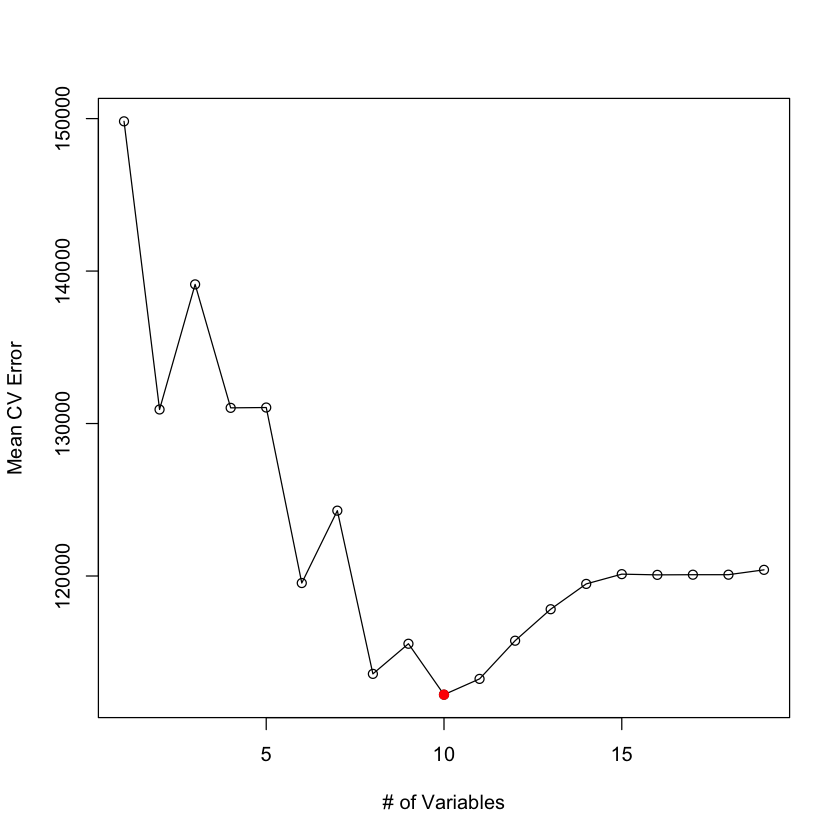

In [70]:
par(mfrow = c(1,1))
plot(mean.cv.errors, type = 'o', xlab = '# of Variables', ylab = 'Mean CV Error')
points(which.min(mean.cv.errors), mean.cv.errors[which.min(mean.cv.errors)],
       col = 'red', cex = 1.5, pch = 20)

We see that cross-validation selects a ten-variable model. We now perform best subset selection on the full data set in order to obtain the ten-variable model.

In [71]:
best.fit <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)
coef(best.fit, 10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680